# Example: Satellite Profile Methodology

In [1]:
# This should match the verified version listed at the start of the notebook
! eups list -s lsst_distrib

   g4213664e8e+7835acb1bb 	w_latest current w_2023_40 setup


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import astropy.units as u
import galsim

from leosim.satellite import DiskSatellite, RectangularSatellite
from leosim.instrument import Instrument

## Introduction to the `Instrument` Class

In [3]:
## Define an instrument
outer_radius = 4.18*u.m
inner_radius = 2.558*u.m
pixel_scale = 0.2*u.arcsec/u.pix

instrument = Instrument(outer_radius, inner_radius, pixel_scale)

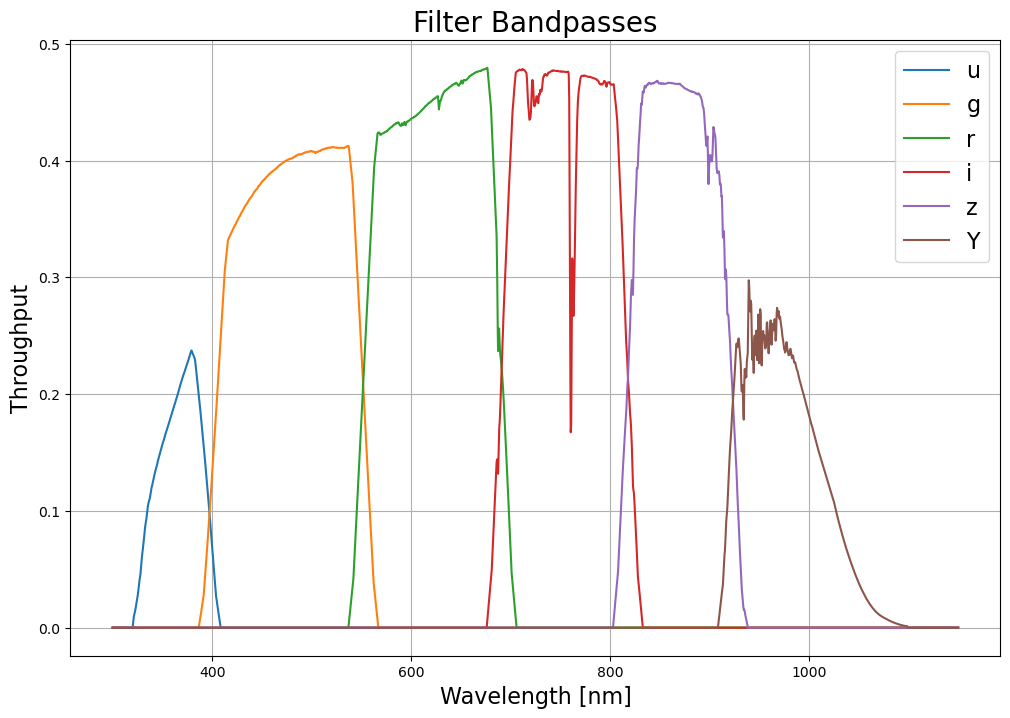

In [4]:
## Plot the LSST Camera bandpasses
fig, ax = plt.subplots(1, 1, figsize=(12, 8), facecolor='white')

bands = ['u', 'g', 'r', 'i', 'z', 'Y']
for band in bands:
    bandpass = instrument.get_bandpass(band)
    ax.plot(bandpass.wavelen, bandpass.sb, label=band)

ax.grid()
ax.set_ylabel('Throughput', fontsize=16)
ax.set_xlabel('Wavelength [nm]', fontsize=16)
ax.set_title('Filter Bandpasses', fontsize=20)
ax.legend(fontsize=16)

# Introduction to the `Satellite` Class

In [5]:
## Define a satellite
height = 550*u.km
zangle = 40*u.deg
radius = 5.0*u.m

satellite = DiskSatellite(height, zangle, radius)

## Define profile scales
step_size = 0.02 
steps = 1000

smin = -int(steps*step_size/2)
smax = int(steps*step_size/2)
scale = np.linspace(smin, smax, steps)

Text(0.5, 0, 'arcsec')

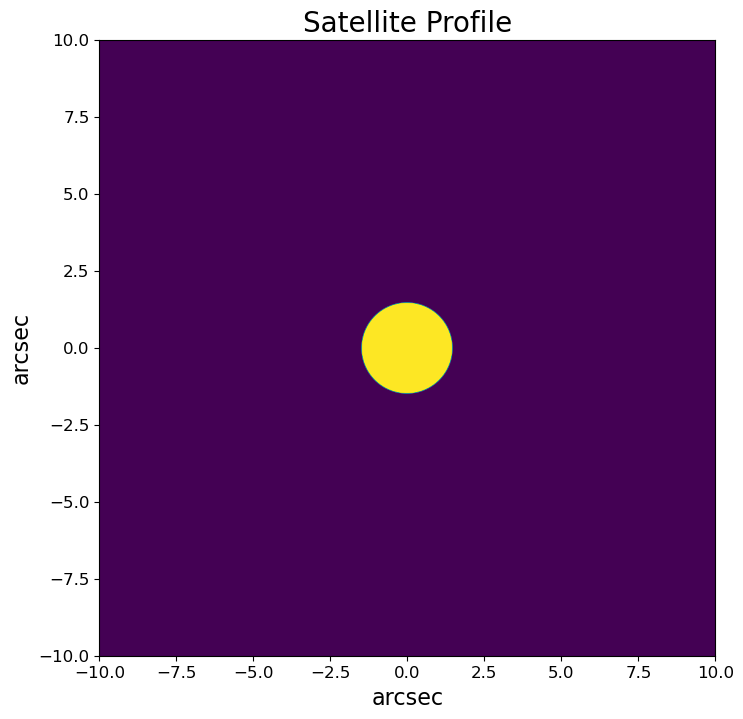

In [6]:
satellite_profile = satellite.profile
satellite_image = satellite_profile.drawImage(scale=step_size, nx=steps, ny=steps)

fig, ax = plt.subplots(1, 1, figsize=(12, 8), facecolor='white')
ax.imshow(satellite_image.array, origin='lower', extent=[smin, smax, smin, smax])
ax.set_title('Satellite Profile', fontsize=20)
ax.tick_params(labelsize=12)
ax.set_ylabel('arcsec', fontsize=16)
ax.set_xlabel('arcsec', fontsize=16)

Text(0.5, 0, 'arcsec')

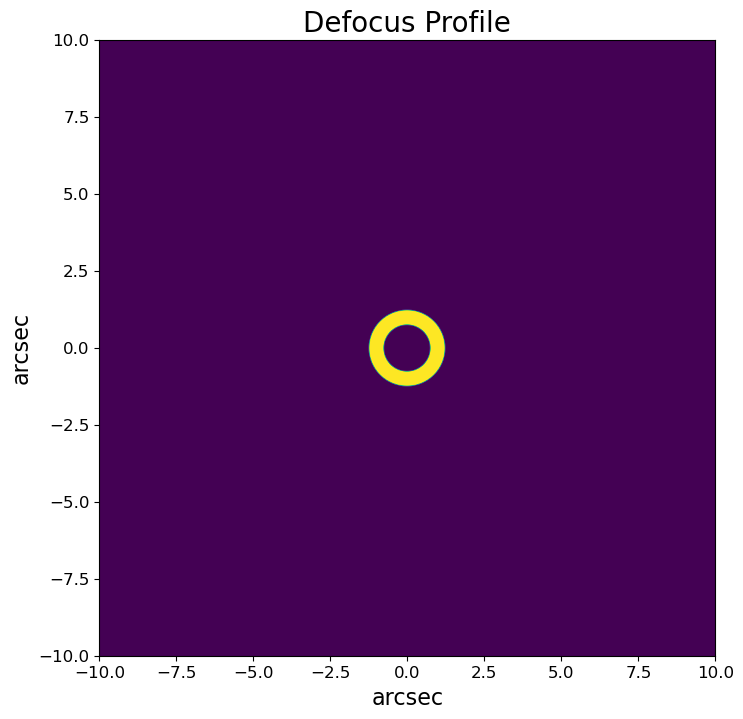

In [7]:
defocus_profile = satellite.get_defocus_profile(instrument)
defocus_image = defocus_profile.drawImage(scale=step_size, nx=steps, ny=steps)

fig, ax = plt.subplots(1, 1, figsize=(12, 8), facecolor='white')
ax.imshow(defocus_image.array, origin='lower', extent=[smin, smax, smin, smax])
ax.set_title('Defocus Profile', fontsize=20)
ax.tick_params(labelsize=12)
ax.set_ylabel('arcsec', fontsize=16)
ax.set_xlabel('arcsec', fontsize=16)

Text(0.5, 0, 'arcsec')

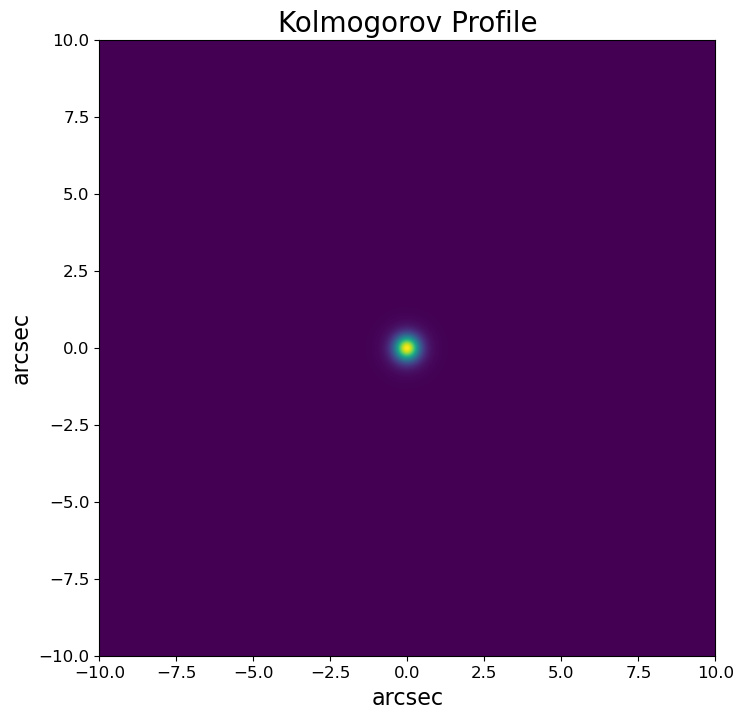

In [8]:
seeing_profile = galsim.Kolmogorov(fwhm=0.67)
seeing_image = seeing_profile.drawImage(scale=step_size, nx=steps, ny=steps)

fig, ax = plt.subplots(1, 1, figsize=(12, 8), facecolor='white')
ax.imshow(seeing_image.array, origin='lower', extent=[smin, smax, smin, smax])
ax.set_title('Kolmogorov Profile', fontsize=20)
ax.tick_params(labelsize=12)
ax.set_ylabel('arcsec', fontsize=16)
ax.set_xlabel('arcsec', fontsize=16)

Text(0.5, 0, 'arcsec')

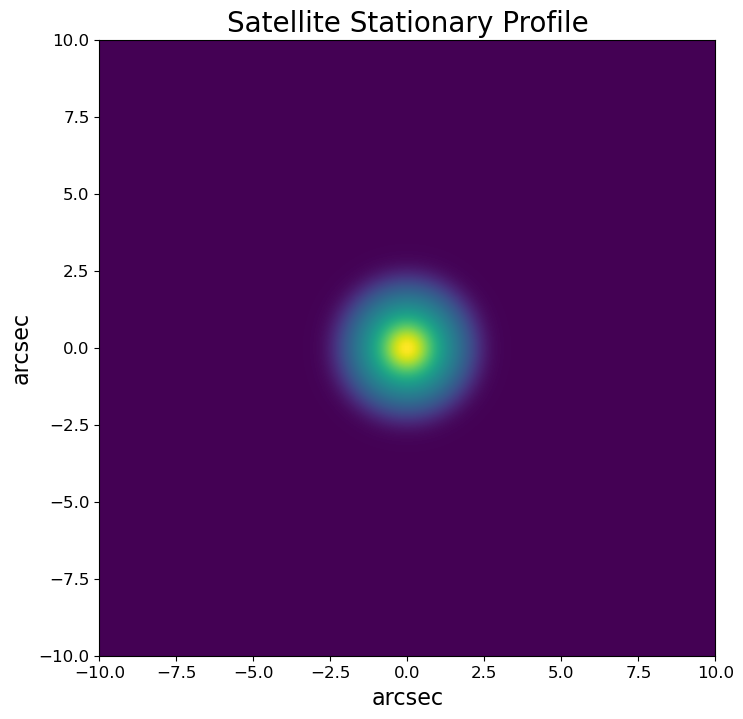

In [9]:
stationary_profile = satellite.get_stationary_profile(seeing_profile, instrument)
stationary_image = stationary_profile.drawImage(scale=step_size, nx=steps, ny=steps)

fig, ax = plt.subplots(1, 1, figsize=(12, 8), facecolor='white')
ax.imshow(stationary_image.array, origin='lower', extent=[smin, smax, smin, smax])
ax.set_title('Satellite Stationary Profile', fontsize=20)
ax.tick_params(labelsize=12)
ax.set_ylabel('arcsec', fontsize=16)
ax.set_xlabel('arcsec', fontsize=16)

Text(0.5, 0, 'arcsec')

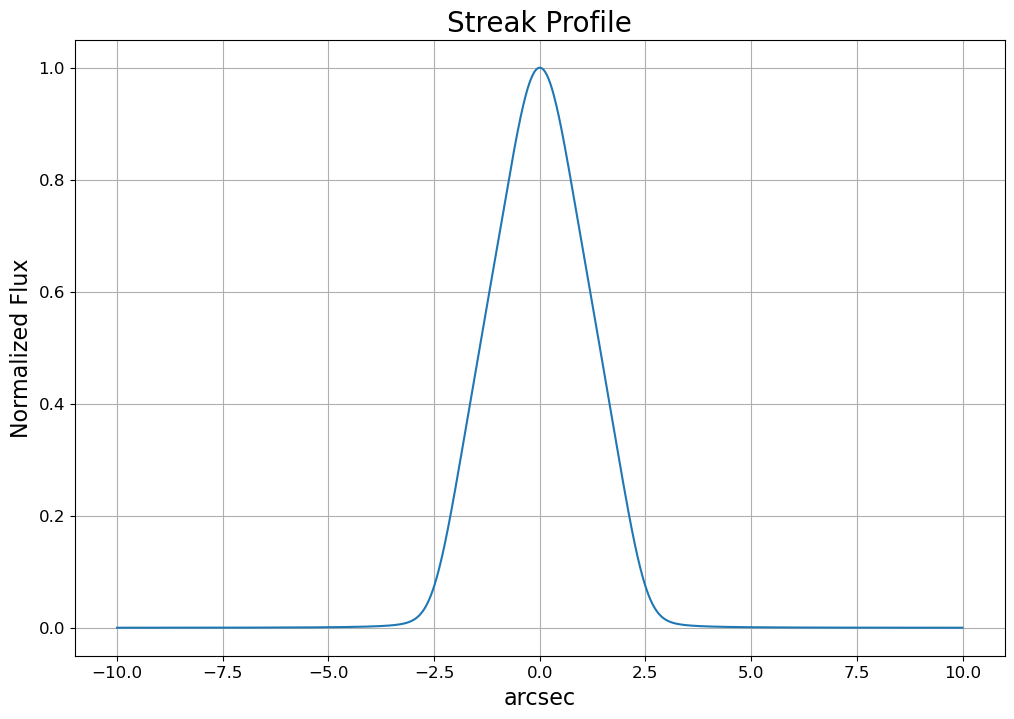

In [10]:
cross_section = stationary_image.array.sum(axis=0)
normalized_cross_section = cross_section/np.max(cross_section)

fig, ax = plt.subplots(1, 1, figsize=(12, 8), facecolor='white')
ax.plot(scale, normalized_cross_section)
ax.grid()
ax.set_title('Streak Profile', fontsize=20)
ax.tick_params(labelsize=12)
ax.set_ylabel('Normalized Flux', fontsize=16)
ax.set_xlabel('arcsec', fontsize=16)